In [6]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [39]:
def f_objective(theta, X, y, l2_param=1):
    '''
    Args:
        theta: 1D numpy array of size num_features
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        l2_param: regularization parameter

    Returns:
        objective: scalar value of objective function
    '''
    n = X.shape[0]
    o = np.logaddexp(0,(-np.dot(X,theta.T) * y))
    return (1/n) * np.sum(o) + l2_param * np.sum(theta**2)
    
def fit_logistic_reg(X, y, objective_function, l2_param=1):
    '''
    Args:
        X: 2D numpy array of size (num_instances, num_features)
        y: 1D numpy array of size num_instances
        objective_function: function returning the value of the objective
        l2_param: regularization parameter
        
    Returns:
        optimal_theta: 1D numpy array of size num_features
    '''
    w_0 = np.zeros(X.shape[1])
    return minimize(objective_function, w_0, (X, y, l2_param)).x

In [83]:
X_train = np.loadtxt('X_train.txt', delimiter=',')
X_val = np.loadtxt('X_val.txt', delimiter=',')
y_train = np.loadtxt('y_train.txt', delimiter=',')
y_val = np.loadtxt('y_val.txt', delimiter=',')
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((1600, 20), (1600,), (400, 20), (400,))

In [84]:
# y=0 to y=-1
for i in range(len(y_train)):
    if y_train[i] == 0:
        y_train[i] = -1

for i in range(len(y_val)):
    if y_val[i] == 0:
        y_val[i] = -1

# normalize
n = X_train.shape[0]
X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train, axis=0)

X_train_norm = (X_train-X_mean)/X_std
X_val_norm = (X_val-X_mean)/X_std

train_bias_term = np.ones(X_train.shape[0]).reshape(X_train.shape[0], 1)
val_bias_term = np.ones(X_val.shape[0]).reshape(X_val.shape[0], 1)
X_train = np.hstack((train_bias_term, X_train_norm))
X_val = np.hstack((val_bias_term, X_val_norm))

X_train.shape, y_train.shape, X_val.shape, y_val.shape


((1600, 21), (1600,), (400, 21), (400,))

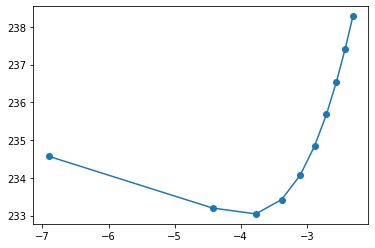

In [85]:
# 7
lambda_list = np.linspace(0.001, 0.1, 10)
result_list = []
for l in lambda_list:
    theta = fit_logistic_reg(X_train, y_train, f_objective, l2_param=l)
    nll = (f_objective(theta, X_val, y_val, l) - l * theta.T @ theta) * len(y_val)
    result_list.append(nll)
plt.plot(np.log(lambda_list), result_list, 'o-')


In [119]:
np.arange(0.05, 1.1, 0.1)

array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05])

In [118]:
np.arange(0.1, 1.1, 0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

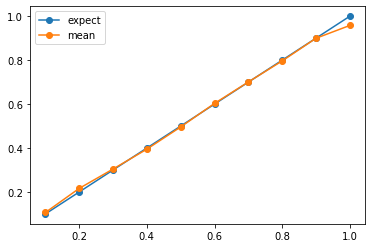

In [116]:
# 8
w = fit_logistic_reg(X_train, y_train, f_objective, l2_param=0.023)
val_prob = 1 / (1 + np.exp(-1 * X_val @ w))
bins = np.arange(0.05, 1.1, 0.1)
indices = np.digitize(val_prob, bins)
pred_prob = np.zeros(10)
count = np.zeros(10)
for i in range(len(indices)):
    pred_prob[indices[i] - 1] += val_prob[i]
    count[indices[i] - 1] += 1
mean_prob = np.zeros(10)
for i in range(10):
    mean_prob[i] = pred_prob[i] / count[i]
expect_prob = np.arange(0.1, 1.1, 0.1)
plt.plot(expect_prob, expect_prob, marker='o', label='expect')
plt.plot(expect_prob, mean_prob, marker='o', label='mean')
plt.legend()
plt.show()
